In [1]:
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
pwd


'/content'

In [ ]:
mnist = tf.keras.datasets.mnist
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [65]:
mnist = tf.keras.datasets.mnist
(train_image_new, train_label_new), (test_image_new, test_label_new) = mnist.load_data()

In [41]:
train_image.shape

(60000, 28, 28, 1)

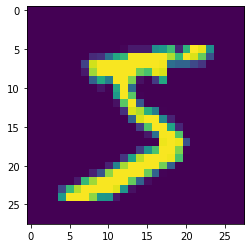

In [66]:
import matplotlib.pyplot as plt
plt.imshow(train_image_new[0])

In [7]:
train_image.shape



(60000, 28, 28)

In [8]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D

In [31]:
from tensorflow.keras.models import Sequential
model2 = Sequential()

In [32]:
# input_shape: chính là anh đầu vào gồm có 28 bức ảnh
# số lượng channel  = 1
model2.add(Conv2D(32, (3,3), activation="relu",input_shape=(28,28,1)))


In [33]:
model2.add(MaxPooling2D(pool_size=(2,2)))

In [34]:
model2.add(Flatten())

In [35]:
# Lớp Maxpooling sẻ giảm kích cỡ feature map xuống 4 lần
# 26 => 13 Chiều dài giảm 2 lần
# 26 => 13 Chiều rộng giảm 2 lần
# channel là ko thay đổi
# Flatten duỗi nó ra tạo ra 1 cái vector 1 chiều độ dài bằng tích của 13 x 13 x32
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [36]:
model2.add(Dense(128, activation="relu"))

In [38]:
# softmax là lấy dạng xác suất
model2.add(Dense(10,activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [42]:
# chuẩn hóa lại dữ liệu trainning
train_image = train_image/ 255.0
# reshape: truyền vào cái hình 4 chiều
# chiều đầu tiên là số lượng ảnh 60000
# chiều thứ 2 là chiều dài 20
# chiều thứ 3 là chiều rộng 20
# số lớp của ảnh là 1 do trong trường hợp này là ảnh xám
train_image = train_image.reshape(60000,28,28,1)


In [151]:
print(train_image_new.shape)

(60000, 28, 28)


In [44]:
test_image = test_image / 255.0
test_image = test_image.reshape(10000,28,28,1)

In [152]:
train_label[0]

5

In [47]:
# Bình thường thì đến đây ta phải chuyền về trainning_label về cái dạng one hot
# sparse_categorical_crossentropy đây chính là cái hàm loss mà cái nhãn có thể làm việc luôn dược với 1 số
# adam chính là 1 cái biến thể của stochastics gradient descent (SGD)
# với SGD mỗi lần chúng ta train thì nó sẻ ra các batch nhỏ khác nhau
# và trainning trong mỗi epochs
# Còn adam lợi thế hơn là nó dựa vào cái độ lớn của đạo hàm nó sẻ tự động điền cái learning_rate của chúng ta

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [49]:
# Nguyên tắc tổng quát
# chỉ học chứ ko nhớ nên cho dù cái dữ liệu đã học rồi thì cái độ chính xác vẫn không thể bằng 100%
model2.fit(train_image, train_label, epochs=10, validation_data=(test_image,test_label))

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.7762 - acc: 0.7751 - val_loss: 64.9396 - val_acc: 0.8369
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3310 - acc: 0.9029 - val_loss: 53.9101 - val_acc: 0.8790
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2738 - acc: 0.9201 - val_loss: 38.6374 - val_acc: 0.9168
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2261 - acc: 0.9327 - val_loss: 31.9028 - val_acc: 0.9324
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1915 - acc: 0.9432 - val_loss: 25.8213 - val_acc: 0.9460
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1658 - acc: 0.9507 - val_loss: 22.6172 - val_acc: 0.9532
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1463 - acc: 0.9561 - val_loss: 21.8302 - val_acc: 0.9564
Epoch 8/10
1875/1875 [===================

In [51]:
cd /content/drive/MyDrive/ColapML

/content/drive/MyDrive/ColapML


In [52]:
model2.save("modelDetectLabel.h5")

In [53]:
saved_model = tf.keras.models.load_model('modelDetectLabel.h5')

In [146]:
result = saved_model.predict(test_image[10:11])

In [57]:
import numpy as np


In [147]:
final = np.argmax(result)
print(final)

0


1

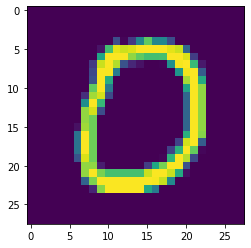

In [148]:
plt.imshow(test_image_new[10])